In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random




In [21]:
train_X = np.loadtxt('E:\\Dataset\\Regularizaton\\train_x.txt', delimiter = ',')
train_Y = np.loadtxt('E:\\Dataset\\Regularizaton\\train_y.txt', delimiter = ',').reshape(1, train_X.shape[1])

test_X = np.loadtxt('E:\\Dataset\\Regularizaton\\test_x.txt', delimiter = ',')
test_Y = np.loadtxt('E:\\Dataset\\Regularizaton\\test_y.txt', delimiter = ',').reshape(1, test_X.shape[1])

In [22]:
print("Shape of train_X : ", train_X.shape)
print("Shape of train_Y : ", train_Y.shape)
print("Shape of test_X : ", test_X.shape)
print("Shape of test_Y : ", test_Y.shape)

Shape of train_X :  (2, 211)
Shape of train_Y :  (1, 211)
Shape of test_X :  (2, 200)
Shape of test_Y :  (1, 200)


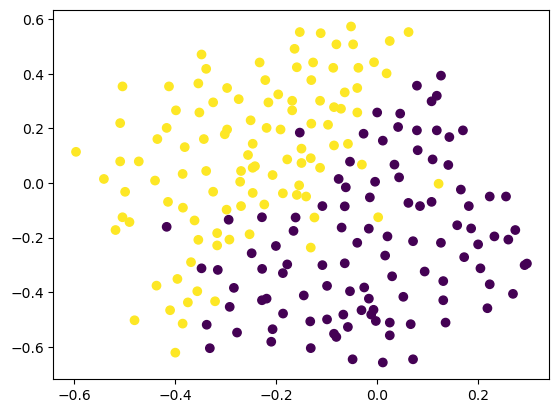

In [23]:
plt.scatter(train_X[0], train_X[1], c=train_Y[0])
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def derivative_tanh(x):
    return (1 - np.power(x, 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

def initialize_parameters(layer_dims):

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
        
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache


def cost_function(A3, Y):
    m = Y.shape[1]
    
    cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))
    
    return cost


def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


def update_parameters(parameters, grads, learning_rate):    
    n = len(parameters) // 2

    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters


def accuracy(X, Y, parameters, dataset_type):
    
    A, _ = forward_propagation(X, parameters)

    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model on " + dataset_type + " dataset is : ", round(acc, 2), "%")
    
    
def predict_dec(parameters, X):
    a3, cache = forward_propagation(X, parameters)
    predictions = (a3>0.5)
    return predictions


def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    
    axes = plt.gca()
    axes.set_xlim([-0.75, 0.40])
    axes.set_ylim([-0.75, 0.65])
    plt.contourf(xx, yy, Z, cmap='twilight')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap='inferno')
    plt.show()

# Model without Regularization


In [25]:
def model(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000):

    grads = {}
    cost_list = []                            
    m = X.shape[1]                        
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)
    
        cost = cost_function(a3, Y)

        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)
    
    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return parameters

Cost after iteration  0  is :  0.695492074816334
Cost after iteration  1000  is :  0.20184182115796886
Cost after iteration  2000  is :  0.1844122301308618


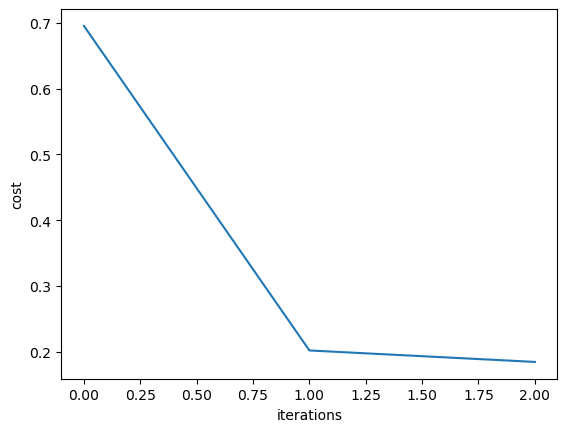

In [18]:
learning_rate = 0.3
num_iterations = 2000+1
layers_dims = [train_X.shape[0],100,10,1]
parameters = model(train_X,train_Y,layers_dims,learning_rate,num_iterations)

Accuracy of the model on Test dataset is :  94.5 %


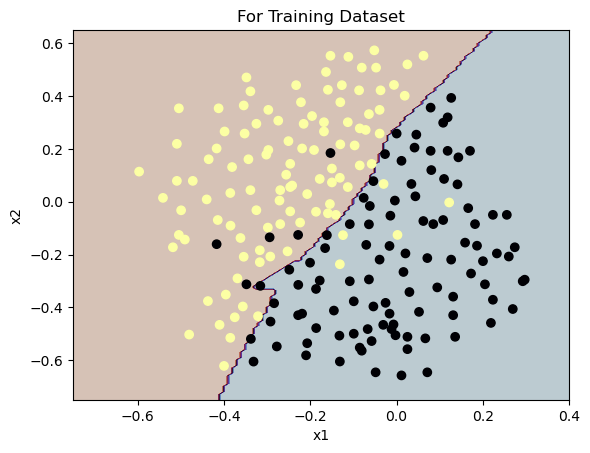

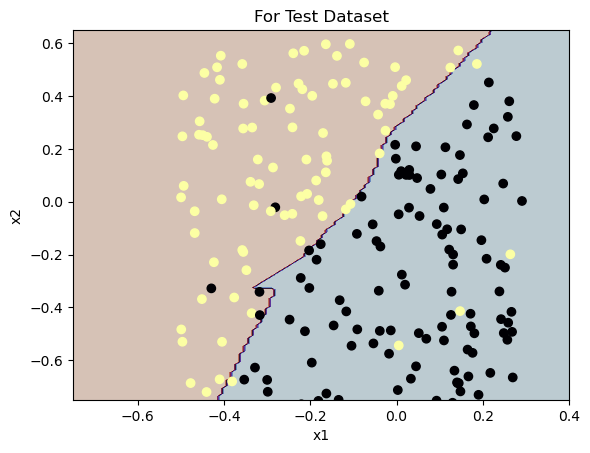

In [34]:

accuracy(test_X,test_Y,parameters,"Test")

plt.title("For Training Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters,x.T),train_X,train_Y)

plt.title("For Test Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters,x.T),test_X,test_Y)




# 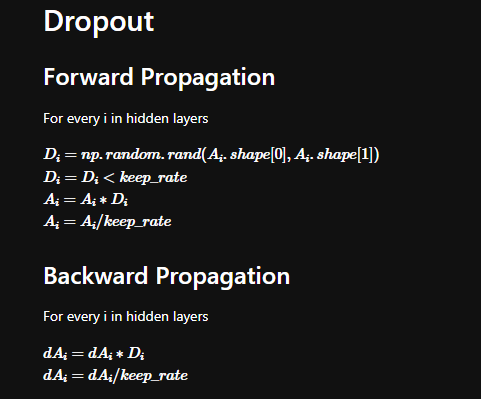

In [27]:
def forward_propagation_with_dropout(X, parameters, keep_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = D1 < keep_rate
    A1 = A1 * D1
    A1 = A1/keep_rate
        
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = D2 < keep_rate
    A2 = A2 * D2
    A2 = A2/keep_rate
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, D1, W1, b1, Z2, A2, D2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [28]:
def backward_propagation_with_dropout(X, Y, cache, keep_rate):
    
    m = X.shape[1]
    (Z1, A1, D1, W1, b1, Z2, A2, D2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    
    dA2 = dA2 * D2
    dA2 = dA2 / keep_rate
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    
    
    dA1 = dA1 * D1
    dA1 = dA1 / keep_rate
    
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients


In [30]:
def model_with_dropout(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000 , keep_rate = 0.85):

    grads = {}
    cost_list = []                            
    m = X.shape[1]                        
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation_with_dropout(X, parameters, keep_rate)
    
        cost = cost_function(a3, Y)

        grads = backward_propagation_with_dropout(X, Y, cache, keep_rate)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)
    
    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return parameters

Cost after iteration  0  is :  0.6962749897505071
Cost after iteration  1000  is :  0.2594283850514483


C:\Users\HP\AppData\Local\Temp\ipykernel_6556\2017111624.py:59: RuntimeWarning: divide by zero encountered in log
  cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))
C:\Users\HP\AppData\Local\Temp\ipykernel_6556\2017111624.py:59: RuntimeWarning: invalid value encountered in multiply
  cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))


Cost after iteration  2000  is :  0.2738160976443098
Cost after iteration  3000  is :  0.1987862698829549
Cost after iteration  4000  is :  0.21239197889225322
Cost after iteration  5000  is :  nan
Cost after iteration  6000  is :  nan
Cost after iteration  7000  is :  nan
Cost after iteration  8000  is :  nan
Cost after iteration  9000  is :  nan
Cost after iteration  10000  is :  nan
Cost after iteration  11000  is :  nan
Cost after iteration  12000  is :  nan
Cost after iteration  13000  is :  nan
Cost after iteration  14000  is :  nan
Cost after iteration  15000  is :  nan
Cost after iteration  16000  is :  nan
Cost after iteration  17000  is :  nan
Cost after iteration  18000  is :  nan
Cost after iteration  19000  is :  nan
Cost after iteration  20000  is :  nan


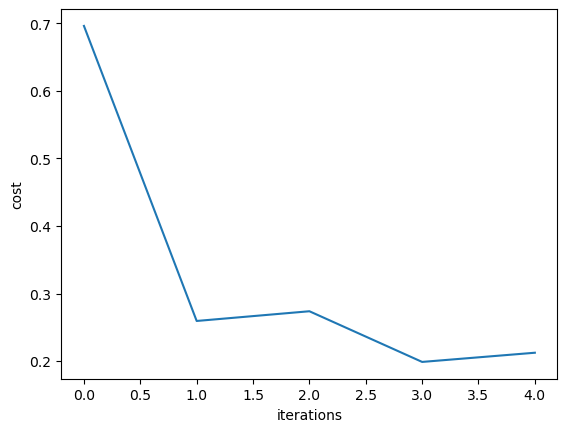

In [31]:
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]
parameters = model_with_dropout(train_X, train_Y, layers_dims, learning_rate, num_iterations, keep_rate = 0.6)

Accuracy of the model on Train dataset is :  95.26 %
Accuracy of the model on Test dataset is :  94.5 %


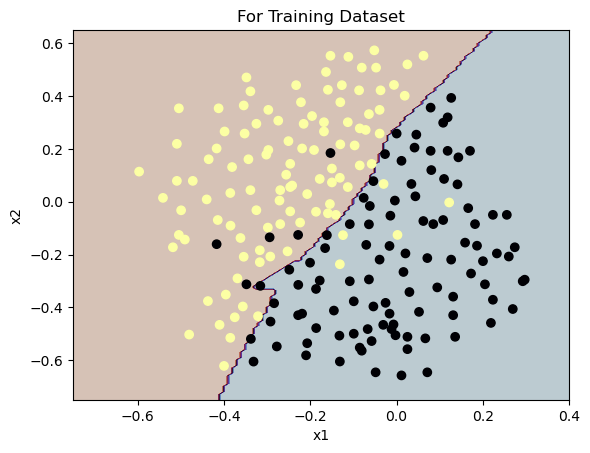

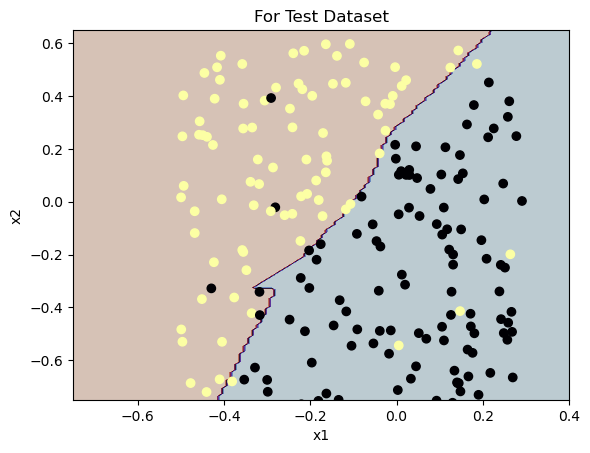

In [32]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)